#**Appendix**

#Explainable Machine Learning --- Homework 1
##*Grzegorz Gruza, 417923*

In [14]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.cuda.get_device_name()
    print(f'GPU: {device}')
    DEVICE = 'cuda'
else:
    print('No GPU available, using CPU.')
    DEVICE = 'cpu'

GPU: Tesla T4


In [15]:
!wget https://raw.githubusercontent.com/adrianstando/imbalanced-benchmarking-set/main/datasets/wine_quality.csv

--2023-10-13 20:27:48--  https://raw.githubusercontent.com/adrianstando/imbalanced-benchmarking-set/main/datasets/wine_quality.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 315368 (308K) [text/plain]
Saving to: ‘wine_quality.csv.8’

wine_quality.csv.8  100%[===================>] 307.98K  --.-KB/s    in 0.02s   

2023-10-13 20:27:48 (13.7 MB/s) - ‘wine_quality.csv.8’ saved [315368/315368]



In [16]:
!pip install tabpfn

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('wine_quality.csv')
df = df.head(2048)

print(df.head())
df = df.dropna()
X = df.drop('TARGET', axis=1)  # Features
y = df['TARGET']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

print("Shapes of the sets:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


   Unnamed: 0    0     1     2     3      4     5      6       7     8     9  \
0           0  7.0  0.27  0.36  20.7  0.045  45.0  170.0  1.0010  3.00  0.45   
1           1  6.3  0.30  0.34   1.6  0.049  14.0  132.0  0.9940  3.30  0.49   
2           2  8.1  0.28  0.40   6.9  0.050  30.0   97.0  0.9951  3.26  0.44   
3           3  7.2  0.23  0.32   8.5  0.058  47.0  186.0  0.9956  3.19  0.40   
4           4  7.2  0.23  0.32   8.5  0.058  47.0  186.0  0.9956  3.19  0.40   

     10  TARGET  
0   8.8      -1  
1   9.5      -1  
2  10.1      -1  
3   9.9      -1  
4   9.9      -1  
Shapes of the sets:
X_train: (1433, 12)
X_test: (615, 12)
y_train: (1433,)
y_test: (615,)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from tabpfn import TabPFNClassifier


# Train Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Evaluate Logistic Regression model
y_pred_logistic = logistic_regression_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("\nLogistic Regression Model:")
print("Accuracy:", accuracy_logistic)
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))


# Train Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)

# Evaluate Gradient Boosting model
y_pred_gb = gradient_boosting_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("\nGradient Boosting Model:")
print("Accuracy:", accuracy_gb)
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))


# Train Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Evaluate Random Forest model
y_pred_rf = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Model:")
print("Accuracy:", accuracy_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


# Train TabPFN
tabpfn_model = TabPFNClassifier(device=DEVICE, N_ensemble_configurations=32)
tabpfn_model.fit(X_train, y_train, overwrite_warning=True)

# Evaluate TabPFN
y_pred_tabpfn = tabpfn_model.predict(X_test)
accuracy_tabpfn = accuracy_score(y_test, y_pred_tabpfn)
print("\nTabPFN:")
print("Accuracy:", accuracy_tabpfn)
print("Classification Report:")
print(classification_report(y_test, y_pred_tabpfn))



Logistic Regression Model:
Accuracy: 0.9512195121951219
Classification Report:
              precision    recall  f1-score   support

          -1       0.95      1.00      0.97       585
           1       0.00      0.00      0.00        30

    accuracy                           0.95       615
   macro avg       0.48      0.50      0.49       615
weighted avg       0.90      0.95      0.93       615



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill


Gradient Boosting Model:
Accuracy: 0.9447154471544715
Classification Report:
              precision    recall  f1-score   support

          -1       0.96      0.98      0.97       585
           1       0.40      0.27      0.32        30

    accuracy                           0.94       615
   macro avg       0.68      0.62      0.65       615
weighted avg       0.94      0.94      0.94       615


Random Forest Model:
Accuracy: 0.943089430894309
Classification Report:
              precision    recall  f1-score   support

          -1       0.96      0.99      0.97       585
           1       0.27      0.10      0.15        30

    accuracy                           0.94       615
   macro avg       0.61      0.54      0.56       615
weighted avg       0.92      0.94      0.93       615

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters

TabPFN:
Accuracy: 0.9512195121951219
Classification Report:
              precision    recall  f1-sc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


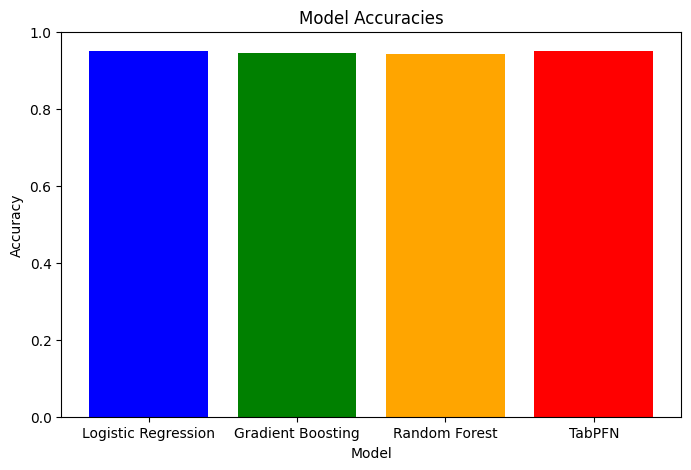

In [19]:
# This is a code cell

import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame with model names and their accuracy
data = {
    'Model': ['Logistic Regression', 'Gradient Boosting', 'Random Forest', 'TabPFN'],
    'Accuracy': [accuracy_logistic, accuracy_gb, accuracy_rf, accuracy_tabpfn]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(df['Model'], df['Accuracy'], color=['blue', 'green', 'orange', 'red'])
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis range to 0-1 for accuracy values
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
